Входные данные представляют собой наборы признаков по клиентам на первое число каждого месяца за 1,5 года (sample данных).
Целевой признак равен 1, если в следующие 3 месяцев клиент купит машиноместо. После покупки машиноместа клиент исключается из наборов данных.

Есть колонки report_date (дата среза признаков) и client_id (уникальный идентификатор клиента). Названия остальных колонок зашифрованы и представляют собой признаковое пространство для скоринга.

Среди признаков по клиенту представлены такие признаки как:
история взаимодействия клиента с сайтом компании за разные периоды времени: просмотры, клики, заполнение форм обратной связи и т.п.
интересы клиента, выявленные в ходе общения с клиентом
история входящих и исходящих звонков по клиенту
история встреч с клиентом
избранные объекты недвижимости клиента
имеющиеся договора клиента
характеристики имеющихся ипотечных заявок
вероятность наличия у клиента авто

Так как не все клиенты проходят через этап сайта, звонка, встречи, брони датасет получается разряженным - это специфика взаимодействия с клиентом. 


In [1]:
# установка библиотек
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# импорт всего что нужно для работы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# загржаем датасет
df = pd.read_csv('train.csv', sep = ',')
# выводим первые 10 строчек
df.head(10)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3548550434.py:2: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,145

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [5]:
# размер датасета
df.shape

(14456, 2666)

In [6]:
# дроп дубликатов и размер дф без них
df = df.drop_duplicates()
df = df.loc[:,~df.columns.duplicated()].copy()
df.shape

(14456, 2666)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [8]:
# удаляем одинаковые колонки

def del_dup(df):
  unique_columns = []
  for column in df.columns:
    if not any(df[column].equals(df[col]) for col in unique_columns):
      unique_columns.append(column)
  return df[unique_columns]

df = del_dup(df)
df.head(10)

,report_date,client_id,target,col1,col2,col3,col4,col5,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


Смотрим размер дф после удаления повторов и сколько колонок с какими типами данных есть

In [9]:
df.shape

(14456, 2213)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2213 entries, report_date to col2663
dtypes: float64(1869), int64(3), object(341)
memory usage: 244.1+ MB


# Работа с пропусками

<Axes: >

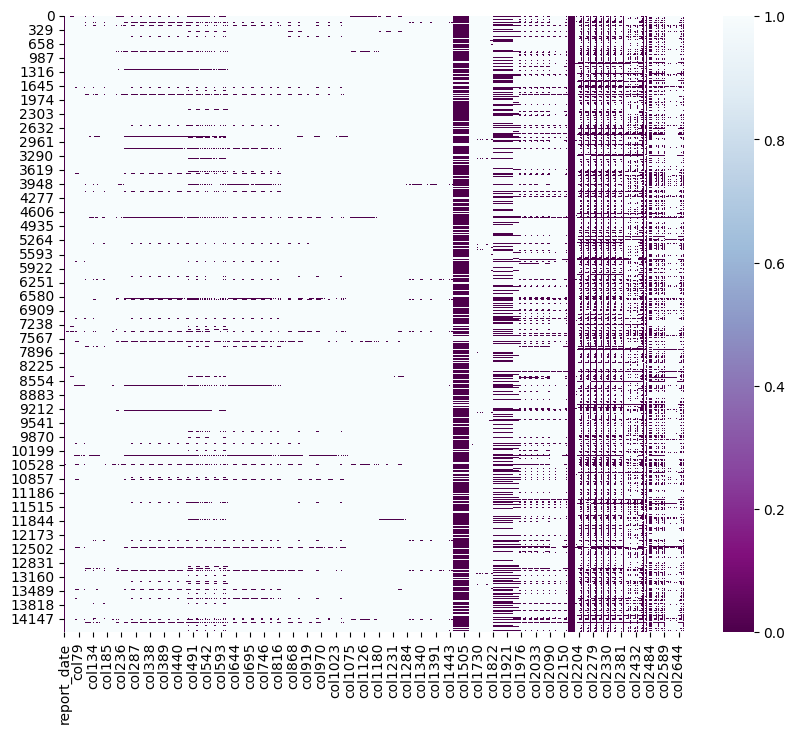

In [11]:
# визуализируем пропуски
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='BuPu_r')

всё очень-очень плохо

In [12]:
# удаляем колонки, в которых только NaN
df = df.dropna(how = 'all', axis = 1)

In [13]:
# смотрим сколько колонок осталось
df.shape

(14456, 2212)

минус одна колонка

In [14]:
# смотрим кол-во пропусков в подписанных колонках
print(f'''Количество пропусков в колонках:
"target" - {df['target'].isnull().sum()}
"report_date" - {df['report_date'].isnull().sum()}
"client_id" - {df['client_id'].isnull().sum()}''')

Количество пропусков в колонках:
"target" - 0
"report_date" - 0
"client_id" - 0


Пропусков в этих колонках нет, -> так же отсутствуют полностью пустые строчки

In [15]:
# ищем ещё колонки, в которых нет пропусков
df.columns[df.notna().all()]

Index(['report_date', 'client_id', 'target', 'col1453', 'col2663'], dtype='object')

Помимо подписанных колонок, пропусков так же нет в колонках "col1453" и "col2663".

Посмотрим, какие данные в них хранятся:

In [16]:
df['col1453'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col1453
Non-Null Count  Dtype
--------------  -----
14456 non-null  int64
dtypes: int64(1)
memory usage: 113.1 KB


In [17]:
df['col1453'].unique()

array([0, 1])

[0, 1] -> булевое значение

In [18]:
df['col2663'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: col2663
Non-Null Count  Dtype  
--------------  -----  
14456 non-null  float64
dtypes: float64(1)
memory usage: 113.1 KB


In [19]:
df['col2663'].unique()

array([0.25626138, 0.25868176, 0.2541643 , ..., 0.26029922, 0.26185761,
       0.28014841], shape=(1026,))

In [20]:
df['col2663'].describe()

count    14456.000000
mean         0.258330
std          0.006802
min          0.230229
25%          0.256261
50%          0.256261
75%          0.257217
max          0.339800
Name: col2663, dtype: float64

какие-то чиселки, вероятность того что человек купит машиноместо

In [21]:
df = df.rename(columns={'col2663': 'probability'})

In [22]:
# удалим колонки, где кол-во пропусков превышает 95%
thresh = len(df)*0.95
df1 = df.loc[:, df.isna().sum().le(thresh)]

In [23]:
df1.head(10)

,report_date,client_id,target,col228,col248,col252,col256,col260,col264,col268,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,probability
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,1.0,0.000000,0.0,1.000000,0.0,1.000000,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,https://samolet.ru/,1.0,0.166667,0.0,0.666667,0.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


<Axes: >

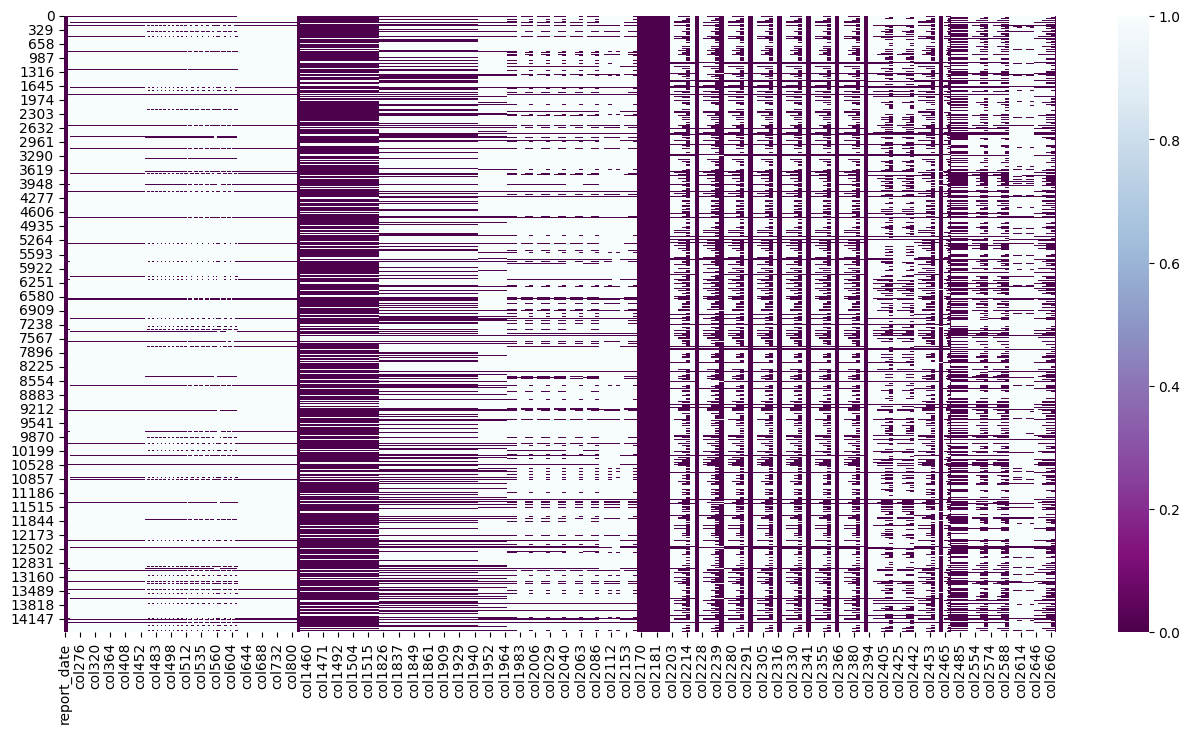

In [24]:
plt.figure(figsize = (16, 8))
sns.heatmap(df1.isnull(), cmap = 'BuPu_r')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 719 entries, report_date to probability
dtypes: float64(673), int64(3), object(43)
memory usage: 79.3+ MB


43 колонки с типом данных object осталось

## Работа с колонками с типом данных "object"
(кодирование\удаление\заполнение)

In [26]:
# смотрим на колонки с типом данных object
df1.select_dtypes(include=['object']).columns

Index(['report_date', 'col228', 'col464', 'col472', 'col516', 'col518',
       'col519', 'col520', 'col524', 'col526', 'col527', 'col528', 'col532',
       'col534', 'col535', 'col536', 'col540', 'col542', 'col543', 'col544',
       'col548', 'col550', 'col551', 'col552', 'col559', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800', 'col1454'],
      dtype='object')

In [27]:
df1['col1454']

0        00f3d719-a6ec-4960-ba01-8372eb705443
1        01febac0-b083-494e-8589-f98400074b94
2        0278175e-c0bb-4e1e-bfe5-20db6811d3e2
3        0364571d-5325-ed11-b823-005056b825cd
4        065957a6-9b2a-435a-b561-024e9e8d9ad7
                         ...                 
14451    fc4b5aa0-c4d6-4394-93db-57a1505e66c4
14452    fcc827d8-b64b-4b59-b718-87f2a51d77a4
14453    fd5f22f5-36f6-4dca-9896-8c9e90bbb702
14454    fdf04fb7-5404-4a9c-ae5b-e1e893060631
14455    fe392549-9af9-4b12-921b-b391693b8b27
Name: col1454, Length: 14456, dtype: object

In [28]:
# смотрим на кол-во уникальных значений и кол-во пропусков
print(f'''Количество уникальных значений: {df1['col1454'].nunique()}
Количество пропусков: {df1['col1454'].isnull().sum()}''')

Количество уникальных значений: 4817
Количество пропусков: 1


в колонке "col1454" хранятся захэшированные данные, с ними ничего дельного не сделать -> удаляем колонку:

In [29]:
df1.drop(['col1454'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3895219348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col1454'], axis = 1, inplace = True)


In [30]:
object_col = ['report_date', 'col228', 'col464', 'col472', 'col516', 'col518',
       'col519', 'col520', 'col524', 'col526', 'col527', 'col528', 'col532',
       'col534', 'col535', 'col536', 'col540', 'col542', 'col543', 'col544',
       'col548', 'col550', 'col551', 'col552', 'col559', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800']

for col in object_col:
    print(f'{col}: {df1[col].unique()}')

report_date: ['2022-11-01' '2022-05-01' '2022-09-01' '2022-08-01' '2023-02-01'
 '2023-01-01' '2022-02-01' '2022-12-01' '2022-06-01' '2022-10-01'
 '2021-08-01' '2021-05-01' '2022-04-01' '2022-03-01' '2022-07-01'
 '2021-10-01' '2021-02-01' '2022-01-01' '2021-12-01' '2021-04-01'
 '2021-06-01' '2021-11-01' '2021-07-01' '2021-09-01' '2021-03-01']
col228: [nan 'https://samolet.ru/'
 'https://samolet.ru/spb/?utm_source=yandex_search&utm_medium=cpc&utm_campaign=samolet_live_yd_s_brand_rf_brand_spb_common_search_search_samolet_text_rf_33~n2jmmjvj|76037737&utm_term=%D0%B7%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D1%89%D0%B8%D0%BA%20%D1%81%D0%B0%D0%BC%D0%BE%D0%BB%D0%B5%D1%82%20%D1%81%D0%BF%D0%B1&utm_content=39756956308_|cid|76037737|gid|4961640683|aid|12383135333|adp|no|pos|premium1|src|search_none|dvc|mobile|reg|146|text_otdelka&calltouch_tm=yd_c:76037737_gb:4961640683_ad:12383135333_ph:39756956308_st:search_pt:premium_p:1_s:none_dt:mobile_reg:146_ret:_apt:none&etext=2202.465i0WoRE91Vhg5hfO__-SXoAFTq

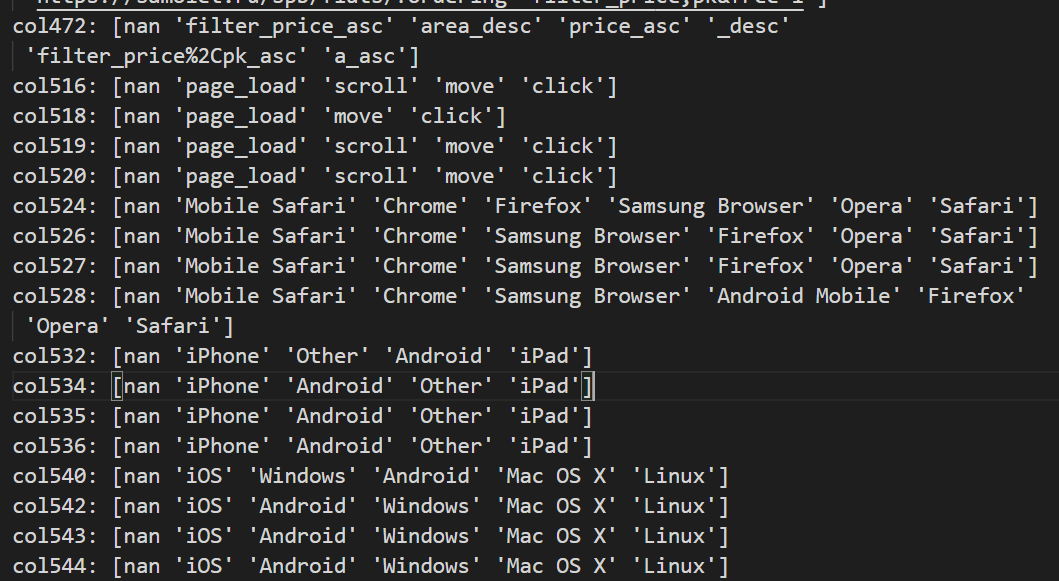

Есть колонки, которые содержат одинкаковые значения, но не были удалены. Выведем их

In [31]:
# с колонки col532 по колонку col536
df_34_36 = df.loc[:, 'col534':'col536']
df_34_36.head(40)

,col534,col535,col536
0,NaN,NaN,NaN
1,iPhone,iPhone,iPhone
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,Android,Android,Android
9,NaN,NaN,NaN


проглядывается, что по строке значения в этих столбцах совпадают. можно объединить их в одну

In [32]:
dev = df1['col534'].combine_first(df1['col535']).combine_first(df1['col536'])
df1['device'] = dev
df1['device'].head(40)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\2240248175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device'] = dev


0         NaN
1      iPhone
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8     Android
9         NaN
10        NaN
11    Android
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19     iPhone
20        NaN
21        NaN
22    Android
23    Android
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35    Android
36      Other
37        NaN
38        NaN
39      Other
Name: device, dtype: object

In [33]:
# удаляем изначальные колонки
df1.drop(columns=['col534', 'col535', 'col536'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\2504228699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['col534', 'col535', 'col536'], axis = 1, inplace = True)


In [34]:
# закодируем данные к колонке:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df1['device'] = le.fit_transform(df1['device'])
int_dev = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "device": {int_dev}')

Новые значения по колонке "device": {'Android': 0, 'Other': 1, 'iPad': 2, 'iPhone': 3, nan: 4}


C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3487320227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device'] = le.fit_transform(df1['device'])


In [35]:
df1['device']

0        4
1        3
2        4
3        4
4        4
        ..
14451    4
14452    4
14453    4
14454    4
14455    4
Name: device, Length: 14456, dtype: int64

In [36]:
# пропуски закодировались тоже... меняем 4-ки оььратно на NaN
df1['device'] = df1['device'].replace([4], np.nan) 
#df1['device'] = df1['device'].astype(int)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3817783139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['device'] = df1['device'].replace([4], np.nan)


In [37]:
df1['device']

0        NaN
1        3.0
2        NaN
3        NaN
4        NaN
        ... 
14451    NaN
14452    NaN
14453    NaN
14454    NaN
14455    NaN
Name: device, Length: 14456, dtype: float64

колонки col559 и col228 хранят ссылки, их можно удалить

In [38]:
df1.drop(['col228'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\607412030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col228'], axis = 1, inplace = True)


In [39]:
df1.drop(['col559'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\2780014963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col559'], axis = 1, inplace = True)


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 714 entries, report_date to device
dtypes: float64(674), int64(3), object(37)
memory usage: 78.7+ MB


In [41]:
# кодируем колонку report_date
df1['report_date'] = le.fit_transform(df1['report_date'])
data_srez = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "report_date": {data_srez}')

Новые значения по колонке "report_date": {'2021-02-01': 0, '2021-03-01': 1, '2021-04-01': 2, '2021-05-01': 3, '2021-06-01': 4, '2021-07-01': 5, '2021-08-01': 6, '2021-09-01': 7, '2021-10-01': 8, '2021-11-01': 9, '2021-12-01': 10, '2022-01-01': 11, '2022-02-01': 12, '2022-03-01': 13, '2022-04-01': 14, '2022-05-01': 15, '2022-06-01': 16, '2022-07-01': 17, '2022-08-01': 18, '2022-09-01': 19, '2022-10-01': 20, '2022-11-01': 21, '2022-12-01': 22, '2023-01-01': 23, '2023-02-01': 24}


C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3554179256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['report_date'] = le.fit_transform(df1['report_date'])


In [42]:
# смотрим на колонку col464
df1['col464'].unique()

array([nan, 'https://samolet.ru/flats/?project=7',
       'https://samolet.ru/flats/?project=21',
       'https://samolet.ru/spb/flats/?free=1&ordering=filter_price,pk&project=25',
       'https://samolet.ru/spb/flats/',
       'https://samolet.ru/flats/?ordering=filter_price,pk&free=1&rooms=4&project=57',
       'https://samolet.ru/spb/flats/?ordering=filter_price,pk&free=1&project=25&rooms=1&settling_date=20243,20234&building=548',
       'https://samolet.ru/flats/?ordering=filter_price,pk&free=1&project=57',
       'https://samolet.ru/flats/?ordering=filter_price,pk&free=1&layout=7258',
       'https://samolet.ru/flats/?project=31&price_min=6800000&price_max=8020734&ordering=filter_price,pk&free=1&renovation=1&has_kitchen=1&rooms=0&settling_date=20241',
       'https://samolet.ru/flats/?free=1&ordering=filter_price,pk&rooms=1&area_min=30&area_max=56&floor_min=2&floor_max=10&project=7',
       'https://samolet.ru/spb/project/zhivi-v-rybackom/',
       'https://samolet.ru/spb/flats/?p

в колонке ссылки, удаляем колонку

In [43]:
df1.drop(['col464'], axis = 1, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\1957327669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col464'], axis = 1, inplace = True)


In [44]:
# смотрим на колонку col472
df1['col472'].unique()

array([nan, 'filter_price_asc', 'area_desc', 'price_asc', '_desc',
       'filter_price%2Cpk_asc', 'a_asc'], dtype=object)

In [45]:
# кодируем эту колонку
df1['col472'] = le.fit_transform(df1['col472'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "col472": {filt}')

Новые значения по колонке "col472": {'_desc': 0, 'a_asc': 1, 'area_desc': 2, 'filter_price%2Cpk_asc': 3, 'filter_price_asc': 4, 'price_asc': 5, nan: 6}


C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3174038655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col472'] = le.fit_transform(df1['col472'])


In [46]:
df1['col472'] = df1['col472'].replace([6], np.nan)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\860608130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col472'] = df1['col472'].replace([6], np.nan)


In [47]:
# следующие колонки
print(df1['col516'].unique(),
df1['col518'].unique(),
df1['col519'].unique(),
df1['col520'].unique(), sep = '\n')

[nan 'page_load' 'scroll' 'move' 'click']
[nan 'page_load' 'move' 'click']
[nan 'page_load' 'scroll' 'move' 'click']
[nan 'page_load' 'scroll' 'move' 'click']


In [48]:
columns = ['col516', 'col518', 'col519', 'col520']
df1[columns].head(40)

,col516,col518,col519,col520
0,NaN,NaN,NaN,NaN
1,page_load,page_load,page_load,page_load
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,page_load,page_load,page_load,page_load
9,NaN,NaN,NaN,NaN


In [49]:
# кодируем, чтобы в каждой колонке одно и то же значение имели одиноковое число

columns = ['col516', 'col518', 'col519', 'col520']


# хранение соответствий между исходными значениями и закодированными
encoding_map = {}
current_code = 1 

for column in columns:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_map:
            encoding_map[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_map[value]

df1[columns].head(40)

,col516,col518,col519,col520
0,NaN,NaN,NaN,NaN
1,1,1,1,1
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,1,1,1,1
9,NaN,NaN,NaN,NaN


In [50]:
print(encoding_map)

{'page_load': 1, 'scroll': 2, 'move': 3, 'click': 4}


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(675), int64(4), object(34)
memory usage: 78.6+ MB


In [52]:
df1['col516'] = df1['col516'].astype(float)
df1['col518'] = df1['col518'].astype(float)
df1['col519'] = df1['col519'].astype(float)
df1['col520'] = df1['col520'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3459417583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col516'] = df1['col516'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3459417583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col518'] = df1['col518'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3459417583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(679), int64(4), object(30)
memory usage: 78.6+ MB


Таким же образом кодируем колонки col524, col526, col527, col528

In [54]:
columns_br = ['col524', 'col526', 'col527', 'col528']


# хранение соответствий между исходными значениями и закодированными
encoding_br = {}
current_code = 1 

for column in columns_br:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_br:
            encoding_br[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_br[value]

df1[columns_br].head(40)

,col524,col526,col527,col528
0,NaN,NaN,NaN,NaN
1,1,1,1,1
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,2,2,2,2
9,NaN,NaN,NaN,NaN


In [55]:
print(encoding_br)

{'Mobile Safari': 1, 'Chrome': 2, 'Firefox': 3, 'Samsung Browser': 4, 'Opera': 5, 'Safari': 6, 'Android Mobile': 7}


In [56]:
df1['col524'] = df1['col524'].astype(float)
df1['col526'] = df1['col526'].astype(float)
df1['col527'] = df1['col526'].astype(float)
df1['col528'] = df1['col528'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\312743321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col524'] = df1['col524'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\312743321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col526'] = df1['col526'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\312743321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Кодируем колонки с ОС

In [57]:
columns_os = ['col540', 'col542', 'col543', 'col544']


# хранение соответствий между исходными значениями и закодированными
encoding_os = {}
current_code = 1 

for column in columns_os:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_os:
            encoding_os[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_os[value]

df1[columns_os].head(40)

,col540,col542,col543,col544
0,NaN,NaN,NaN,NaN
1,1,1,1,1
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,2,3,3,3
9,NaN,NaN,NaN,NaN


In [58]:
print(encoding_os)

{'iOS': 1, 'Windows': 2, 'Android': 3, 'Mac OS X': 4, 'Linux': 5}


In [59]:
df1['col540'] = df1['col540'].astype(float)
df1['col542'] = df1['col542'].astype(float)
df1['col543'] = df1['col543'].astype(float)
df1['col544'] = df1['col544'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3829376615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col540'] = df1['col540'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3829376615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col542'] = df1['col542'].astype(float)
C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3829376615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(687), int64(4), object(22)
memory usage: 78.6+ MB


In [61]:
df1.select_dtypes(include=['object']).columns

Index(['col532', 'col548', 'col550', 'col551', 'col552', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800'],
      dtype='object')

In [62]:
object_col1 = ['col532', 'col548', 'col550', 'col551', 'col552', 'col560', 'col568',
       'col576', 'col588', 'col590', 'col591', 'col592', 'col596', 'col598',
       'col599', 'col600', 'col604', 'col606', 'col607', 'col608', 'col616',
       'col800']

for col in object_col1:
    print(f'{col}: {df1[col].unique()}\n\n')

col532: [nan 'iPhone' 'Other' 'Android' 'iPad']


col548: [nan '/project/sputnik/' '/' '/spb/project/astrid/'
 '/purchase/installment/' '/project/verejskaya-41/'
 '/news/unikalnaya-rassrochka-na-vse-kladovye-pomesheniya/' '/account/'
 '/account/flats/119817' '/account/login/' '/project/pyatnitskie-luga/'
 '/flats/' '/promo/samolet-bonus/' '/spb/flats/'
 '/purchase/employee-discount/' '/account/contracts/'
 '/project/sputnik/flats/117189/' '/spb/project/zhivi-v-rybackom/'
 '/spb/project/malaya-ohta/flats/77263/' '/storage/'
 '/news/rekomendujte-samolet-i-zarabotajte-100-000-rublej/' '/spb/'
 '/project/' '/spb/project/sunday/' '/project/verejskaya-41/flats/162269/'
 '/spb/parking/' '/news/' '/spb/account/login/' '/ipoteka-001/'
 '/contacts/novodanilovskaya-8' '/spb/it-mortgage/'
 '/project/zarechye-park/' '/account/payment/success/'
 '/account/flats/97044' '/project/troparevo-park/' '/spb/storage/'
 '/project/sputnik/flats/116774/'
 '/spb/project/zhivi-v-rybackom/flats/113612/'
 '/spb/pr

In [63]:
# хранение соответствий между исходными значениями и закодированными
encoding_q = {'Android': 0, 'Other': 1, 'iPad': 2, 'iPhone': 3}
current_code = 1 

for idx, value in enumerate(df1['col532']):
    # не кодируем пропуски (NaN)
    if pd.isna(value):
        continue
    if value not in encoding_q:
         encoding_q[value] = current_code
         current_code += 1
    df1.at[idx, 'col532'] = encoding_q[value]

df1['col532'].head(40)


0     NaN
1       3
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8       1
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19      3
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35      0
36      1
37    NaN
38    NaN
39      1
Name: col532, dtype: object

In [64]:
df1['col532'] = df1['col532'].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\167921929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col532'] = df1['col532'].astype(float)


Кодируем колонки со странами 

In [65]:
columns_country = ['col588', 'col590', 'col591', 'col592']
df1[columns_country].head(40)

,col588,col590,col591,col592
0,NaN,NaN,NaN,NaN
1,Russia,Russia,Russia,Russia
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,Russia,Russia,Russia,Russia
9,NaN,NaN,NaN,NaN


In [66]:
# хранение соответствий между исходными значениями и закодированными
encoding_country = {}
current_code = 1 

for column in columns_country:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_country:
            encoding_country[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_country[value]

df1[columns_country].head(40)

,col588,col590,col591,col592
0,NaN,NaN,NaN,NaN
1,1,1,1,1
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,1,1,1,1
9,NaN,NaN,NaN,NaN


In [67]:
print(encoding_country)

{'Russia': 1, 'Kazakhstan': 2, 'Netherlands': 3, 'United States': 4, 'Montenegro': 5, 'Lebanon': 6, 'Sweden': 7, 'Germany': 8, 'Estonia': 9, 'Turkey': 10, 'Thailand': 11, 'Spain': 12, 'France': 13, 'Belgium': 14, 'Antigua and Barbuda': 15, 'Japan': 16, 'Finland': 17, 'Belarus': 18, 'Hungary': 19, 'Saudi Arabia': 20, 'United Kingdom': 21, 'Cyprus': 22, 'United Arab Emirates': 23, 'Poland': 24, 'Armenia': 25, 'Ukraine': 26}


In [68]:
df1[columns_country] = df1[columns_country].astype(float)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\3702238450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns_country] = df1[columns_country].astype(float)


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 713 entries, report_date to device
dtypes: float64(692), int64(4), object(17)
memory usage: 78.6+ MB


In [70]:
df1['col560'].unique()

array([nan, 'https://samolet.ru/',
       'https://samolet.ru/spb/flats/?free=1&ordering=filter_price,pk&project=25&rooms=0&area_min=24&area_max=27.44',
       'https://yandex.ru/', 'https://3ds-ds1.mirconnect.ru/',
       'https://samolet.ru/account/login/?next=/account/flats/165351',
       'https://www.google.com/', 'https://click.mail.ru/',
       'https://samolet.ru/account/login/?next=/account/flats/119817',
       'https://samolet.ru/account/login/?next=/account/flats/152201',
       'https://samolet.ru/project/novoe-vnukovo/?ysclid=la6us4gr1w556242526',
       'https://samolet.ru/account/login/?next=/account/favorites',
       'https://samolet.ru/account/deal/79c327be-ce7b-ed11-b823-005056b8a6c4/',
       'https://samolet.ru/spb/project/zhivi-v-rybackom/',
       'https://netmonet.co/',
       'https://samolet.ru/flats/?project=7&price_min=5574038&price_max=10873459&ordering=filter_price,pk&free=1&settling_date=20244&area_min=33&area_max=49.19',
       'https://duckduckgo.com/'

В колонке col560 ссылки, цдаляем колонку

In [71]:
df1.drop(['col560'], axis = 1, inplace=True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\1682056284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col560'], axis = 1, inplace=True)


In [72]:
df1['col800'].unique()

array([nan, '9c3b7e8f-941c-e811-80dd-005056b8d207',
       '6da279e4-2805-ea11-80ed-005056b8d207',
       'fab35ba8-af78-ec11-8121-005056b8d207',
       '3f7995b6-cb53-eb11-810b-005056b8d207',
       'a2d8abff-78b8-e611-80bf-005056b8d207',
       '983b7e8f-941c-e811-80dd-005056b8d207',
       'c151fc0d-9b43-e811-80de-005056b8d207',
       'dfad20e9-8c4b-e711-80c5-005056b8d207',
       'a43b7e8f-941c-e811-80dd-005056b8d207',
       'a03b7e8f-941c-e811-80dd-005056b8d207',
       '3b7995b6-cb53-eb11-810b-005056b8d207',
       'a23b7e8f-941c-e811-80dd-005056b8d207',
       '3d7995b6-cb53-eb11-810b-005056b8d207',
       '07091659-2705-e911-80e5-005056b8d207',
       'e48f6c85-7414-e711-80c1-005056b8d207',
       '92d863a3-1665-ea11-80f7-005056b8d207',
       '97a6d484-1665-ea11-80f7-005056b8d207',
       'deb76297-1665-ea11-80f7-005056b8d207',
       '3700ca2a-35dd-ea11-80fc-005056b8d207',
       'e34c4077-7127-e811-80dd-005056b8d207',
       '2c30ab69-847a-eb11-8110-005056b8d207',
       '

всякие закодированные (?) штуки, с них ничего не получить, -> удаляем

In [73]:
df1.drop(['col800'], axis = 1, inplace=True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_20560\194556554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['col800'], axis = 1, inplace=True)


In [74]:
df['col568'].unique()

array([nan, 'sms', 'cpc', 'email', 'cpm', 'messenger', 'push', 'cpa',
       'fix', 'samolet', 'social-owned', 'special'], dtype=object)

Информация в колонке показывает, как пользователь попал на сайт

In [75]:
df1 = df1.rename(columns={'col568': 'going_to_the_site'})

In [76]:
# кодируем эту колонку
df1['going_to_the_site'] = le.fit_transform(df1['going_to_the_site'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "going_to_the_site": {filt}')

Новые значения по колонке "going_to_the_site": {'cpa': 0, 'cpc': 1, 'cpm': 2, 'email': 3, 'fix': 4, 'messenger': 5, 'push': 6, 'samolet': 7, 'sms': 8, 'social-owned': 9, 'special': 10, nan: 11}


In [77]:
df1['going_to_the_site'] = df1['going_to_the_site'].replace([11], np.nan)

In [78]:
df1['going_to_the_site'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14456 entries, 0 to 14455
Series name: going_to_the_site
Non-Null Count  Dtype  
--------------  -----  
1034 non-null   float64
dtypes: float64(1)
memory usage: 113.1 KB


In [79]:
df1['col576'].unique()

array([nan, 'exponea', 'yandex_search', 'sms', 'yandex_network',
       'telegram_channels', 'google_search', 'trigger', 'yandex',
       'domclick_media', 'google_maps', 'google_network', 'cian_feed',
       'vk', 'ya_maps', 'mail_partners', 'instagram', 'S7'], dtype=object)

В колонке то, откуда человек перешёл на сайт (по рекламе???)

In [80]:
# кодируем эту колонку
df1['col576'] = le.fit_transform(df1['col576'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "col576": {filt}')

Новые значения по колонке "col576": {'S7': 0, 'cian_feed': 1, 'domclick_media': 2, 'exponea': 3, 'google_maps': 4, 'google_network': 5, 'google_search': 6, 'instagram': 7, 'mail_partners': 8, 'sms': 9, 'telegram_channels': 10, 'trigger': 11, 'vk': 12, 'ya_maps': 13, 'yandex': 14, 'yandex_network': 15, 'yandex_search': 16, nan: 17}


In [81]:
df1['going_to_the_site'] = df1['going_to_the_site'].replace([17], np.nan)

Ещё колонки:

In [82]:
print(f'''{df1['col548'].unique()}

{df1['col550'].unique()}

{df1['col551'].unique()}

{df1['col552'].unique()}''')

[nan '/project/sputnik/' '/' '/spb/project/astrid/'
 '/purchase/installment/' '/project/verejskaya-41/'
 '/news/unikalnaya-rassrochka-na-vse-kladovye-pomesheniya/' '/account/'
 '/account/flats/119817' '/account/login/' '/project/pyatnitskie-luga/'
 '/flats/' '/promo/samolet-bonus/' '/spb/flats/'
 '/purchase/employee-discount/' '/account/contracts/'
 '/project/sputnik/flats/117189/' '/spb/project/zhivi-v-rybackom/'
 '/spb/project/malaya-ohta/flats/77263/' '/storage/'
 '/news/rekomendujte-samolet-i-zarabotajte-100-000-rublej/' '/spb/'
 '/project/' '/spb/project/sunday/' '/project/verejskaya-41/flats/162269/'
 '/spb/parking/' '/news/' '/spb/account/login/' '/ipoteka-001/'
 '/contacts/novodanilovskaya-8' '/spb/it-mortgage/'
 '/project/zarechye-park/' '/account/payment/success/'
 '/account/flats/97044' '/project/troparevo-park/' '/spb/storage/'
 '/project/sputnik/flats/116774/'
 '/spb/project/zhivi-v-rybackom/flats/113612/'
 '/spb/project/zhivi-v-rybackom/flats/113448/'
 '/project/sputnik/f

В этих колонках какие-то пути\ссылки, -> удаляем

In [83]:
df1.drop(['col548', 'col550', 'col551', 'col552'], axis = 1, inplace=True)

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 707 entries, report_date to device
dtypes: float64(693), int64(5), object(9)
memory usage: 78.0+ MB


In [85]:
df1.select_dtypes(include=['object']).columns

Index(['col596', 'col598', 'col599', 'col600', 'col604', 'col606', 'col607',
       'col608', 'col616'],
      dtype='object')

In [86]:
object_col2 = ['col596', 'col598', 'col599', 'col600', 'col604', 'col606', 'col607',
       'col608', 'col616']

for col in object_col2:
    print(f'{col}: {df1[col].unique()}\n\n')

col596: [nan 'Moscow' 'St.-Petersburg' 'Khanty-Mansia' 'Bashkortostan Republic'
 'Sakhalin Oblast' 'Volgograd Oblast' 'Almaty'
 'Primorskiy (Maritime) Kray' 'Novosibirsk Oblast' 'Yamalo-Nenets'
 'Chelyabinsk Oblast' 'Tatarstan Republic' 'South Holland'
 'Krasnodar Krai' 'Krasnodarskiy Kray' "Vladimirskaya Oblast'"
 'Leningrad Oblast' 'Kaliningrad Oblast' 'Voronezh Oblast' 'Kirov Oblast'
 'Irkutsk Oblast' 'Arkhangelskaya' 'Moscow Oblast' 'Transbaikal Territory'
 'Lipetsk Oblast' 'Krasnoyarsk Krai' 'California' 'Khabarovsk'
 'Yaroslavl Oblast' 'North Ossetia–Alania' 'Dagestan' 'Tomsk Oblast'
 'Vladimir Oblast' 'Rostov Oblast' 'Podgorica' 'Samara Oblast' 'Murmansk'
 'Nizhny Novgorod Oblast' 'Sakha' 'Omsk Oblast' 'Stockholm County'
 'Magadan Oblast' 'Perm Krai' 'Hesse' 'Krasnoyarskiy Kray' 'Tallinn'
 'Antalya' 'Orenburg Oblast' 'Nonthaburi' 'Komi' 'Kamchatka' 'Barcelona'
 'Amur Oblast' 'Stavropol Kray' 'West Flanders Province' 'Penza Oblast'
 'Kabardino-Balkariya Republic' 'Astrakhan Oblas

In [87]:
# кодируем колонку col616
df1['col616'] = le.fit_transform(df1['col616'])
filt = {l: i for i, l in enumerate(le.classes_)}
print(f'Новые значения по колонке "col616": {filt}')

Новые значения по колонке "col616": {'DuckDuckGo': 0, 'Gmail': 1, 'Google': 2, 'Mail.ru': 3, 'Vkontakte': 4, 'Yandex': 5, nan: 6}


In [88]:
df1['col616'] = df1['col616'].replace([6], np.nan)

In [89]:
town_colnm = ['col596', 'col598', 'col599', 'col600', 'col604', 'col606', 'col607',
       'col608']

encoding_tw = {}
current_code = 1 

for column in town_colnm:
    for idx, value in enumerate(df1[column]):
        # не кодируем пропуски (NaN)
        if pd.isna(value):
            continue
        if value not in encoding_tw:
            encoding_tw[value] = current_code
            current_code += 1
        df1.at[idx, column] = encoding_tw[value]

df1[town_colnm] = df1[town_colnm].astype(float)
df1[town_colnm].head(40)

,col596,col598,col599,col600,col604,col606,col607,col608
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
print(encoding_tw)

{'Moscow': 1, 'St.-Petersburg': 2, 'Khanty-Mansia': 3, 'Bashkortostan Republic': 4, 'Sakhalin Oblast': 5, 'Volgograd Oblast': 6, 'Almaty': 7, 'Primorskiy (Maritime) Kray': 8, 'Novosibirsk Oblast': 9, 'Yamalo-Nenets': 10, 'Chelyabinsk Oblast': 11, 'Tatarstan Republic': 12, 'South Holland': 13, 'Krasnodar Krai': 14, 'Krasnodarskiy Kray': 15, "Vladimirskaya Oblast'": 16, 'Leningrad Oblast': 17, 'Kaliningrad Oblast': 18, 'Voronezh Oblast': 19, 'Kirov Oblast': 20, 'Irkutsk Oblast': 21, 'Arkhangelskaya': 22, 'Moscow Oblast': 23, 'Transbaikal Territory': 24, 'Lipetsk Oblast': 25, 'Krasnoyarsk Krai': 26, 'California': 27, 'Khabarovsk': 28, 'Yaroslavl Oblast': 29, 'North Ossetia–Alania': 30, 'Dagestan': 31, 'Tomsk Oblast': 32, 'Vladimir Oblast': 33, 'Rostov Oblast': 34, 'Podgorica': 35, 'Samara Oblast': 36, 'Murmansk': 37, 'Nizhny Novgorod Oblast': 38, 'Sakha': 39, 'Omsk Oblast': 40, 'Stockholm County': 41, 'Magadan Oblast': 42, 'Perm Krai': 43, 'Hesse': 44, 'Krasnoyarskiy Kray': 45, 'Tallinn':

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 707 entries, report_date to device
dtypes: float64(702), int64(5)
memory usage: 78.0 MB


Матрица корреляции:

Text(0.5, 1.0, 'Матрица корреляции')

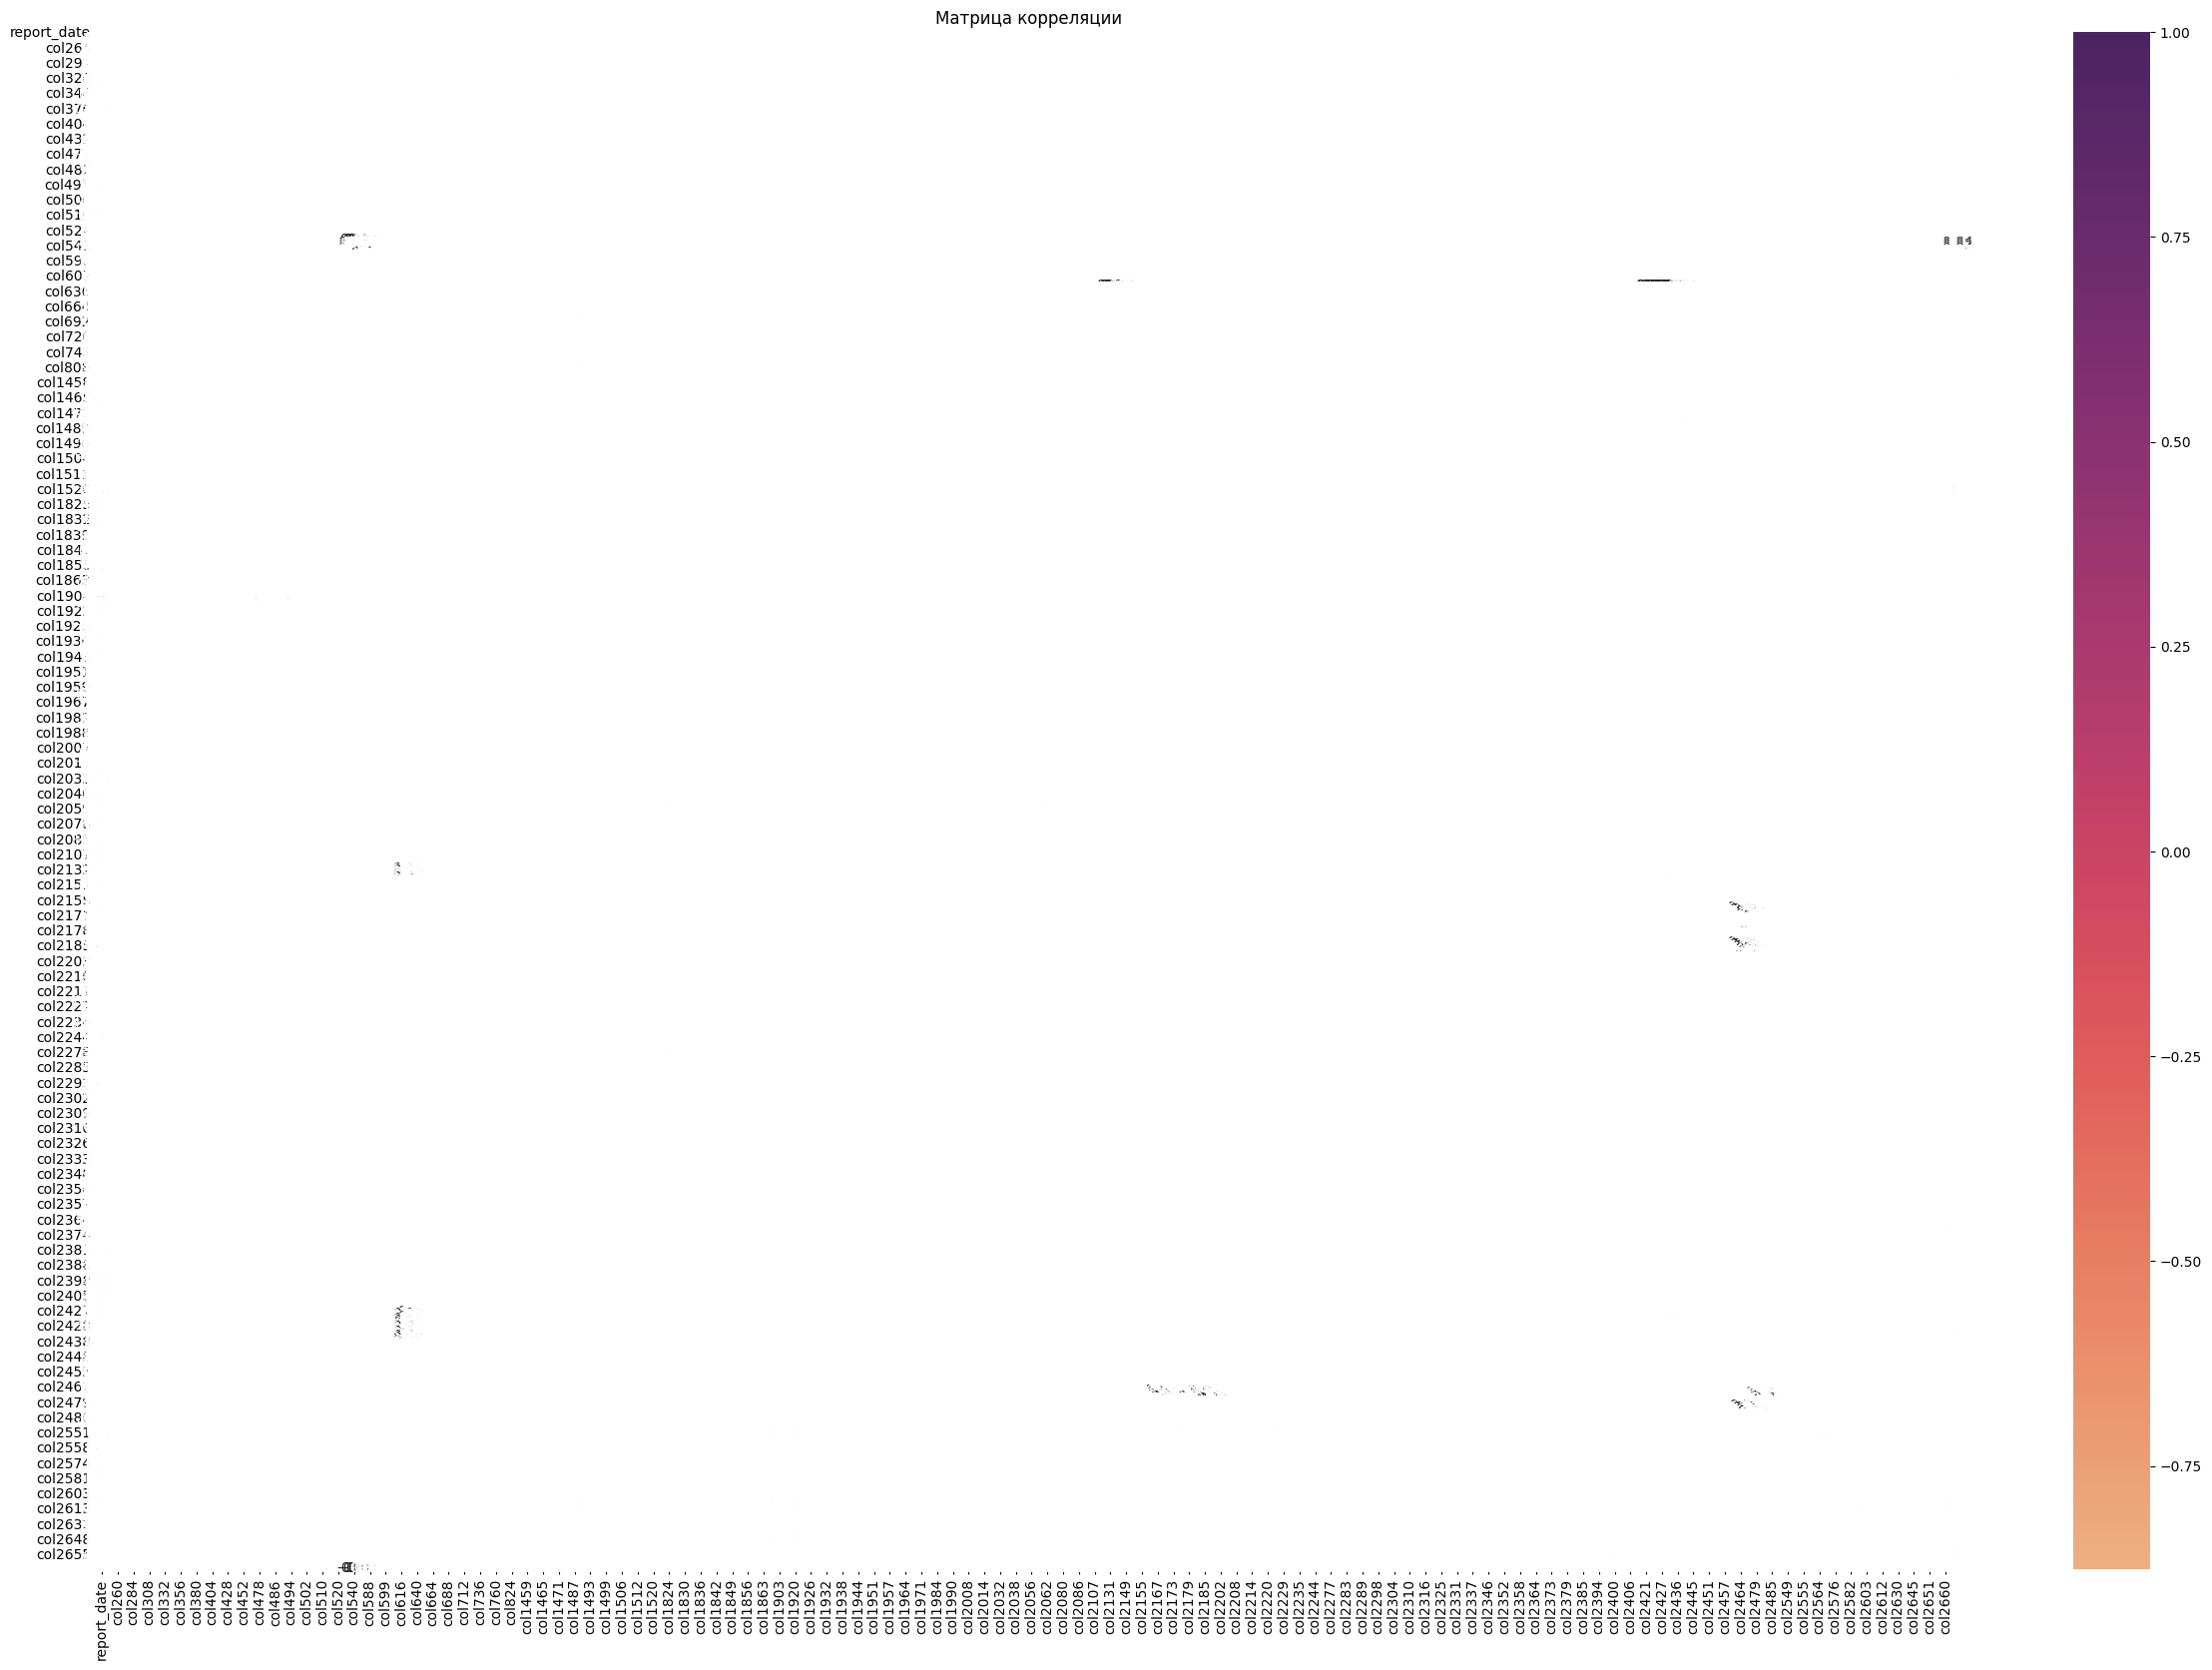

In [93]:
plt.figure(figsize = (30,20))
sns.heatmap(df1.corr(), cmap = 'flare', annot = True)
plt.title('Матрица корреляции')